In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [85]:
country=[]
region=[]
income=[]
incometype=[]
regiontype=[]

In [93]:
input_file = 'data_multivar_nb.txt'

# Load data from input file
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1] 
len(data)

400

In [3]:
def CSVdata(filename,dates):
    datacsv=pd.read_csv(filename)
    country=datacsv.iloc[:,0]
    date=datacsv.iloc[:,1]
    infant=datacsv.iloc[:,2]
    neonatal=datacsv.iloc[:,3]
    under=datacsv.iloc[:,4]
    sortinfant = []
    sortneonatal = []
    sortunder=[]
    data=[]
    last=[]
    
    
    for i in range(len(infant)):
        u=0
        for j in range(len(infant[i])):
            u=u+1
            if(str(infant[i][j])!='['):
                continue
            else:
                sortinfant.append(float(infant[i][:j-1]))
                
                
    for i in range(len(neonatal)):
        u=0
        for j in range(len(neonatal[i])):
            u=u+1
            if(str(neonatal[i][j])!='['):
                continue
            else:
                sortneonatal.append(float(neonatal[i][:j-1]))
                
    for i in range(len(under)):
        u=0
        for j in range(len(under[i])):
            u=u+1
            if(str(under[i][j])!='['):
                continue
            else:
                sortunder.append(float(under[i][:j-1]))
                
                
    for i in range(len(date)):
        if(str(date[i])==dates):
            dirc=[country[i],sortinfant[i]]
            data.append(dirc)
    return data

In [4]:
def JSONdata(filename):
    with open(filename, 'r') as f:
        datastore = json.load(f)
    for i in range(0,len(datastore['dimension'][0]['code'])):
        country.append(datastore['dimension'][0]['code'][i]['display'])
        flag1=False
        flag2=False
        for j in range(0,len(datastore['dimension'][0]['code'][i]['attr'])):
            if datastore['dimension'][0]['code'][i]['attr'][j]['category']=='WHO_REGION':
                region.append(datastore['dimension'][0]['code'][i]['attr'][j]['value'])
                flag1=True
                if datastore['dimension'][0]['code'][i]['attr'][j]['value'] not in regiontype:
                    regiontype.append(datastore['dimension'][0]['code'][i]['attr'][j]['value'])
            if datastore['dimension'][0]['code'][i]['attr'][j]['category']=='WORLD_BANK_INCOME_GROUP':
                income.append(datastore['dimension'][0]['code'][i]['attr'][j]['value'])
                flag2=True
                if datastore['dimension'][0]['code'][i]['attr'][j]['value'] not in incometype:
                    incometype.append(datastore['dimension'][0]['code'][i]['attr'][j]['value'])

In [5]:
def MergeData(data):
    merge={}
    rm=[]
    inc=[]
    und=[]
    con=[]
    for i in range(0,len(data)):
        if data[i][0] in country:
            con.append(data[i][0])
            rm.append(region[country.index(data[i][0])])
            inc.append(income[country.index(data[i][0])])
            und.append(data[i][1])
    merge={'country':con,
           'region':rm,
           'income':inc,
           'under':und
        }
    return merge

In [7]:
JSONdata("COUNTRY.json")
data1=CSVdata('WHOSIS_MDG_000003.csv','2016')
merge1=MergeData(data1)

In [8]:
data2=CSVdata('WHOSIS_MDG_000003.csv','2000')
merge2=MergeData(data2)

 We are plotting graph with child infant mortality rate and Who Region/ World Bank Income Group/ Total

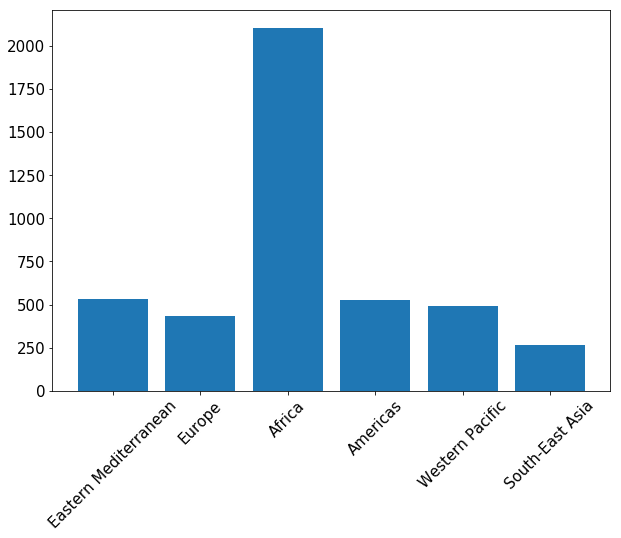

In [60]:
#merge1 region
listofSum=[]
for i in range(0,len(regiontype)):
    sum=0
    for j in range(0,len(merge1['region'])):
        if merge1['region'][j]==regiontype[i]:
            sum=sum+merge1['under'][j]
    listofSum.append(sum)
    
plt.bar(regiontype,listofSum)
plt.rcParams['figure.figsize']={10,7}
plt.rcParams.update({'font.size':15})
plt.xticks(rotation='45')
plt.show()

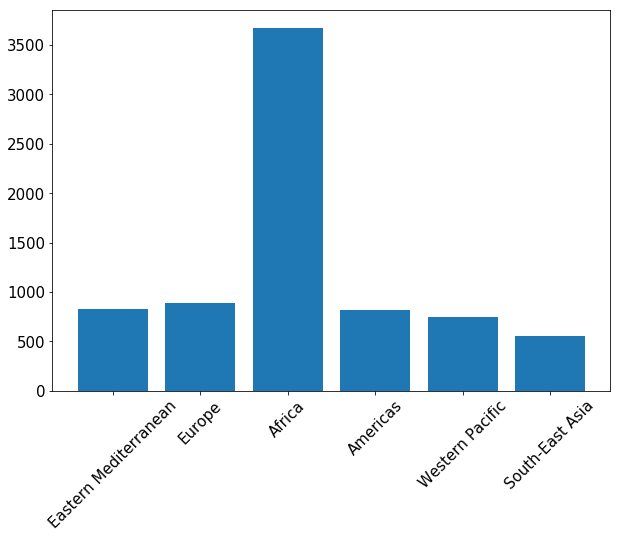

In [10]:
#merger 2 region
listofSum=[]
for i in range(0,len(regiontype)):
    sum=0
    for j in range(0,len(merge2['region'])):
        if merge2['region'][j]==regiontype[i]:
            sum=sum+merge2['under'][j]
    listofSum.append(sum)
plt.bar(regiontype,listofSum)
plt.rcParams['figure.figsize']={10,7}
plt.rcParams.update({'font.size':15})
plt.xticks(rotation='45')
plt.show()


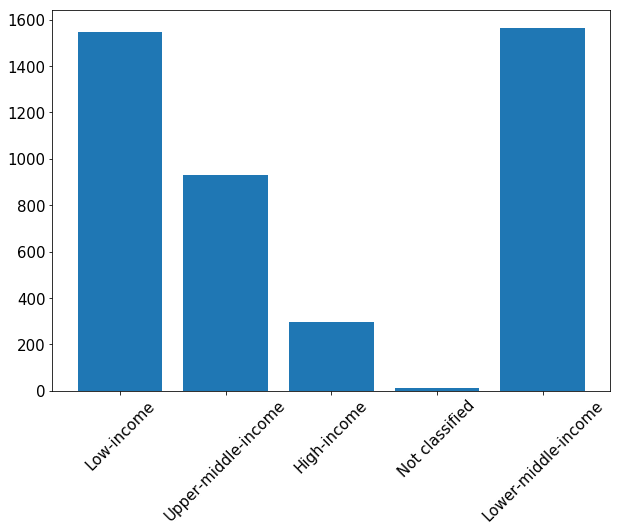

In [11]:
#merge1 income
listofSum=[]
for i in range(0,len(incometype)):
    sum=0
    for j in range(0,len(merge1['income'])):
        if merge1['income'][j]==incometype[i]:
            sum=sum+merge1['under'][j]
    listofSum.append(sum)
    
plt.bar(incometype,listofSum)
plt.rcParams['figure.figsize']={10,7}
plt.rcParams.update({'font.size':15})
plt.xticks(rotation='45')
plt.show()


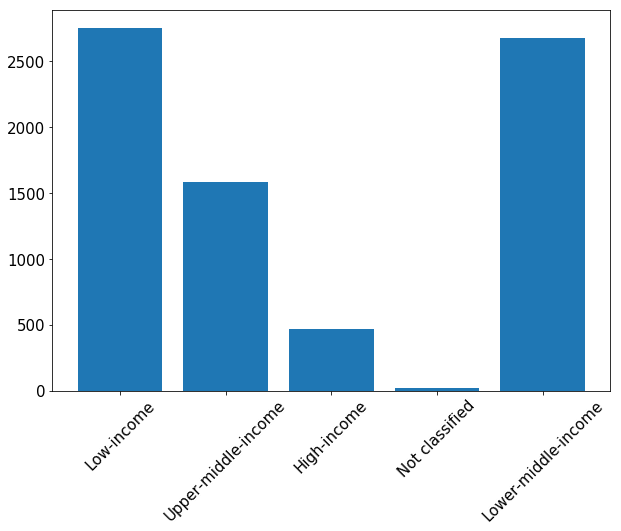

In [12]:
#merger 2 income

listofSum=[]
for i in range(0,len(incometype)):
    sum=0
    for j in range(0,len(merge2['income'])):
        if merge2['income'][j]==incometype[i]:
            sum=sum+merge2['under'][j]
    listofSum.append(sum)
plt.bar(incometype,listofSum)
plt.rcParams['figure.figsize']={10,7}
plt.rcParams.update({'font.size':15})
plt.xticks(rotation='45')
plt.show()


In [83]:
pollutiondata = pd.read_csv('AirPollutionCountry.csv', header=None, names=['Country','Urban','Total'])
pollutiondata.drop([0,1,2], axis=0, inplace= True)
pollutiondata = pollutiondata.reset_index(drop=True)
pollutiondata.drop(['Urban'], axis=1, inplace=True)
datalist1 = []
datalist1 = pollutiondata.values.tolist()

In [14]:
data3=CSVdata('WHOSIS_MDG_000003.csv','2014')

In [58]:
listofMortality = []
listofPollution = []
listofCountries = []
for i in range(0,5):
    for j in range(0, len(data3)):
        if( data3[j][0] == datalist1[i][0]):
            listofMortality.append(data3[j][1])
    listofPollution.append(datalist1[i][1])
    listofCountries.append(datalist1[i][0])

listofPollution=list(map(float,listofPollution))

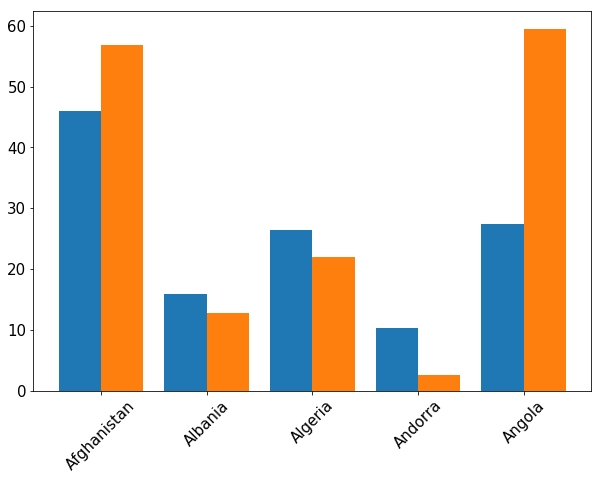

In [59]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

def subcategory(X, vals,width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2 + i/float(n)*width, vals[i], width=width/float(n), align='edge')
    plt.xticks(_X,X)
subcategory(listofCountries, [listofPollution,listofMortality])
plt.rcParams['figure.figsize']={10,7}
plt.rcParams.update({'font.size':15})
plt.xticks(rotation='45')
plt.show()

In [71]:
listofMortality1 = []
listofPollution1 = []
listofCountries1 = []
for i in range(23,28):
    for j in range(0, len(data3)):
        if( data3[j][0] == datalist1[i][0]):
            listofMortality1.append(data3[j][1])
    listofPollution1.append(datalist1[i][1])
    listofCountries1.append(datalist1[i][0])

listofPollution1=list(map(float,listofPollution1))

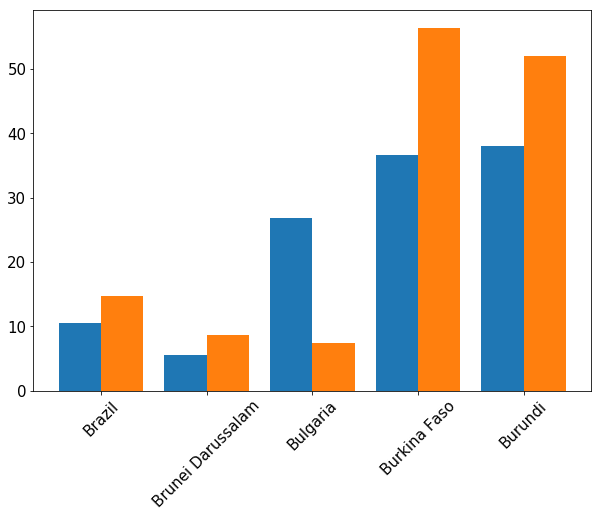

In [72]:
subcategory(listofCountries1, [listofPollution1,listofMortality1])
plt.rcParams['figure.figsize']={10,7}
plt.rcParams.update({'font.size':15})
plt.xticks(rotation='45')
plt.show()